In [92]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
#from keras.models import Sequential
#from keras.layers import Dense

In [2]:
albedo_top_data=pd.read_csv("..\ML4SCI_GSoC\Messenger\Mercury\mercury-albedo-top-half.png.csv",header=None)

In [3]:
albedo_top_data.head()

,0,1,2,3,4,5,6,7,8,9,...,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439
0,0.486275,0.498039,0.521569,0.529412,0.541176,0.596078,0.643137,0.678431,0.686275,0.698039,...,0.509804,0.552941,0.600000,0.600000,0.584314,0.552941,0.501961,0.478431,0.474510,0.474510
1,0.486275,0.498039,0.521569,0.529412,0.541176,0.596078,0.643137,0.678431,0.686275,0.698039,...,0.509804,0.552941,0.600000,0.600000,0.584314,0.552941,0.501961,0.478431,0.474510,0.474510
2,0.027451,0.019608,0.011765,0.007843,0.003922,0.003922,0.007843,0.019608,0.031373,0.035294,...,0.015686,0.019608,0.011765,0.011765,0.015686,0.023529,0.015686,0.019608,0.019608,0.031373
3,0.027451,0.019608,0.011765,0.007843,0.003922,0.003922,0.007843,0.019608,0.031373,0.035294,...,0.015686,0.019608,0.011765,0.011765,0.015686,0.023529,0.015686,0.019608,0.019608,0.031373
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
albedo_top_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,...,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,0.396427,0.394325,0.391678,0.385904,0.385261,0.380229,0.381144,0.380784,0.376122,0.376601,...,0.411688,0.408704,0.405207,0.400022,0.402952,0.401688,0.403322,0.400479,0.397342,0.401797
std,0.115433,0.110688,0.105231,0.097998,0.097741,0.101651,0.100978,0.104517,0.106795,0.106535,...,0.120430,0.124439,0.127068,0.126736,0.129505,0.134696,0.134036,0.124164,0.119342,0.124844
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.329412,0.333333,0.333333,0.329412,0.329412,0.321569,0.325490,0.325490,0.317647,0.317647,...,0.344118,0.341176,0.337255,0.337255,0.337255,0.325490,0.329412,0.324510,0.324510,0.328431
50%,0.384314,0.384314,0.388235,0.384314,0.388235,0.380392,0.384314,0.384314,0.372549,0.372549,...,0.403922,0.398039,0.392157,0.386275,0.388235,0.386275,0.384314,0.390196,0.388235,0.388235
75%,0.454902,0.447059,0.451961,0.451961,0.447059,0.436275,0.439216,0.436275,0.435294,0.435294,...,0.466667,0.462745,0.450980,0.444118,0.450980,0.447059,0.462745,0.454902,0.450980,0.454902
max,0.847059,0.850980,0.737255,0.631373,0.737255,0.741176,0.737255,0.749020,0.749020,0.768627,...,0.741176,0.831373,0.854902,0.792157,0.839216,0.901961,0.909804,0.874510,0.835294,0.921569


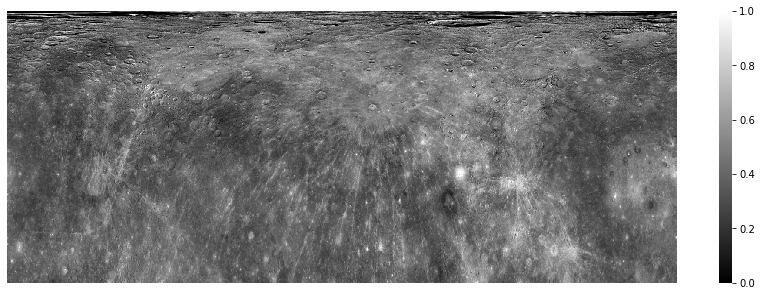

In [5]:
plt.subplots(figsize=(15,5))
sns.heatmap(albedo_top_data,xticklabels=False,yticklabels=False,cmap='gray')

In [6]:
albedo_bottom_data=pd.read_csv("..\ML4SCI_GSoC\Messenger\Mercury\mercury-albedo-resized-bottom-half.png.csv",header=None)

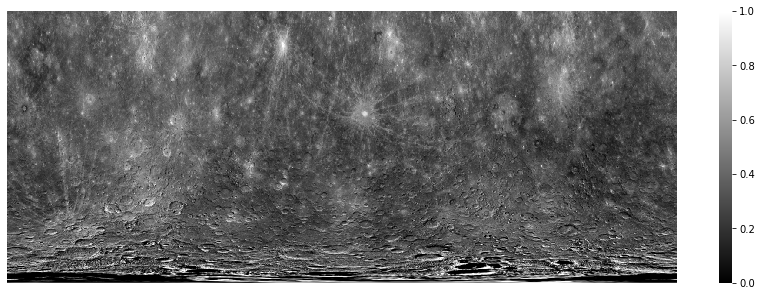

In [7]:
plt.subplots(figsize=(15,5))
sns.heatmap(albedo_bottom_data,xticklabels=False,yticklabels=False,cmap='gray')

In [8]:
mgsi_map_data=pd.read_csv("..\ML4SCI_GSoC\Messenger\Mercury\mgsimap_smooth_032015.png.csv",header=None)
mgsi_map_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,...,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,0.485016,0.485289,0.485528,0.485795,0.485234,0.484722,0.484897,0.485871,0.486068,0.486280,...,0.480191,0.480452,0.480779,0.480997,0.482119,0.482446,0.482865,0.483170,0.483497,0.483813
std,0.110547,0.110530,0.110478,0.110411,0.111816,0.113262,0.113268,0.111801,0.111829,0.111882,...,0.113883,0.113765,0.113674,0.113639,0.112285,0.112227,0.112165,0.112118,0.112070,0.112037
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.450980,0.450980,0.454902,0.454902,0.454902,0.450980,0.450980,0.450980,0.450980,0.450980,...,0.443137,0.443137,0.443137,0.443137,0.443137,0.442157,0.443137,0.447059,0.447059,0.447059
50%,0.513726,0.513726,0.513726,0.513726,0.513726,0.513726,0.513726,0.513726,0.513726,0.513726,...,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.513726,0.513726,0.513726
75%,0.552941,0.552941,0.552941,0.552941,0.552941,0.552941,0.550000,0.549020,0.549020,0.549020,...,0.552941,0.552941,0.552941,0.552941,0.552941,0.552941,0.552941,0.552941,0.552941,0.552941
max,0.619608,0.615686,0.615686,0.611765,0.611765,0.607843,0.607843,0.603922,0.600000,0.600000,...,0.615686,0.615686,0.611765,0.611765,0.611765,0.607843,0.607843,0.607843,0.603922,0.603922


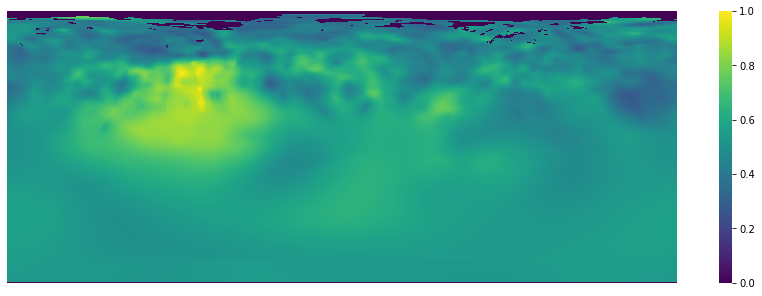

In [9]:
plt.subplots(figsize=(15,5))
sns.heatmap(mgsi_map_data,xticklabels=False,yticklabels=False,cmap='viridis')

In [10]:
alsi_map_data=pd.read_csv("..\ML4SCI_GSoC\Messenger\Mercury\\alsimap_smooth_032015.png.csv",header=None)

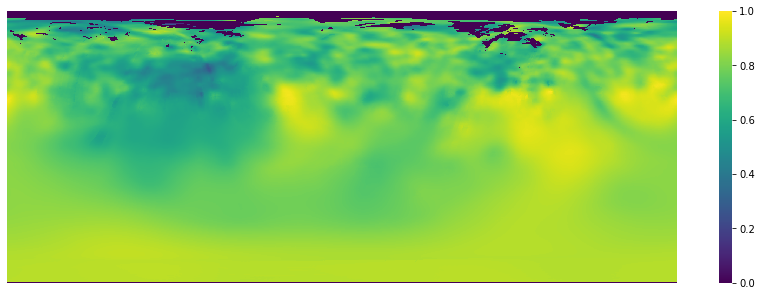

In [11]:
plt.subplots(figsize=(15,5))
sns.heatmap(alsi_map_data,xticklabels=False,yticklabels=False,cmap='viridis')

In [12]:
ssi_map_data=pd.read_csv("..\ML4SCI_GSoC\Messenger\Mercury\\ssimap_smooth_032015.png.csv",header=None)

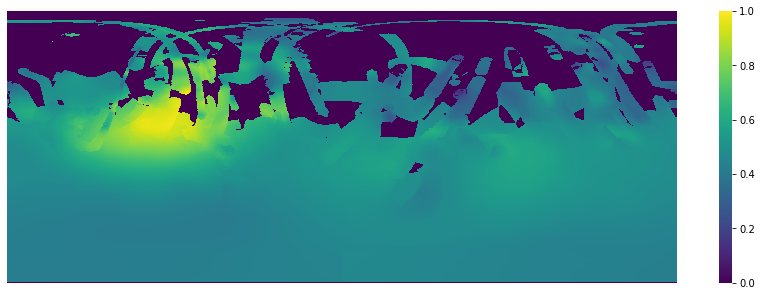

In [13]:
plt.subplots(figsize=(15,5))
sns.heatmap(ssi_map_data,xticklabels=False,yticklabels=False,cmap='viridis')

In [14]:
casi_map_data=pd.read_csv("..\ML4SCI_GSoC\Messenger\Mercury\\casimap_smooth_032015.png.csv",header=None)

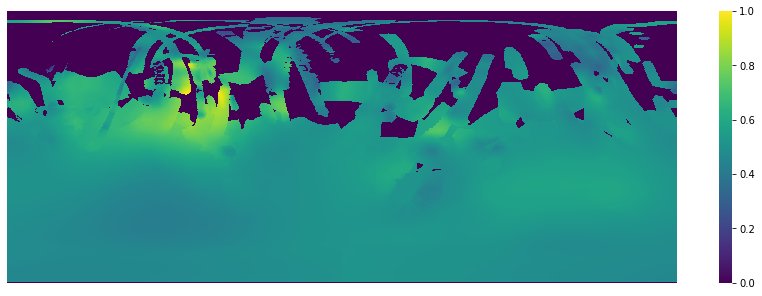

In [15]:
plt.subplots(figsize=(15,5))
sns.heatmap(casi_map_data,xticklabels=False,yticklabels=False,cmap='viridis')

In [16]:
fesi_map_data=pd.read_csv("..\ML4SCI_GSoC\Messenger\Mercury\\fesimap_smooth_032015.png.csv",header=None)

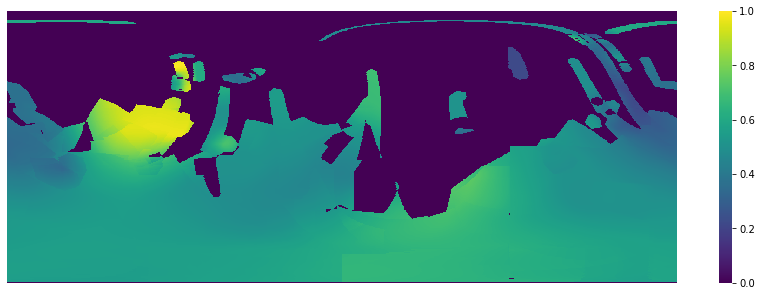

In [17]:
plt.subplots(figsize=(15,5))
sns.heatmap(fesi_map_data,xticklabels=False,yticklabels=False,cmap='viridis')

In [95]:
# this is the function for converting every dataset into a column vector.
def column_converter(data):
    scale_dat=StandardScaler()
    val=Scale.fit_transform(data)
    column_arr=val.reshape(-1,1,order='F') # here order='F' specifies that it will read column vice
    return column_arr
# returned value will be a column vector of type ndarray

In [96]:
albedo_top_column=column_converter(albedo_top_data)
mgsi_map_column=column_converter(mgsi_map_data)
alsi_map_column=column_converter(alsi_map_data)
ssi_map_column=column_converter(ssi_map_data)
casi_map_column=column_converter(casi_map_data)
fesi_map_column=column_converter(fesi_map_data)

NameError: name 'Scale' is not defined

In [20]:
mgsi_map_column.shape

(1036800, 1)

In [21]:
X_train=albedo_top_column

In [22]:
Y_train=np.concatenate((mgsi_map_column,alsi_map_column,ssi_map_column,casi_map_column,fesi_map_column),axis=1)

In [23]:
Y_train.shape

(1036800, 5)

In [24]:
model=LinearRegression(normalize=True)

In [25]:
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [26]:
pred=model.predict(X_train)

In [27]:
pred.shape

(1036800, 5)

In [89]:
r2_score(Y_train,pred)

0.004471946894451739

In [33]:
model3=DecisionTreeRegressor()
model3.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [34]:
pred3=model3.predict(X_train)

In [35]:
r2_score(Y_train,pred3)

0.43223810735350715

In [36]:
model5=Ridge()

In [37]:
model5.fit(X_train,Y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [38]:
pred7=model5.predict(X_train)

In [39]:
r2_score(Y_train,pred7)

0.004471946894440327

In [47]:
modelk=RandomForestRegressor()

In [48]:
modelk.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [51]:
val=modelk.predict(X_train)

In [52]:
r2_score(Y_train,val)

0.4276202650771383

## cross validation score

In [53]:
from sklearn.model_selection import cross_val_score

In [60]:
# function for cross validation score.
def crossval_score(model,X,Y):
    score=cross_val_score(model,X,Y,scoring='neg_mean_squared_error')
    score1=np.sqrt(-score)
    return score1.mean(),score1.std()

In [61]:
#dataset for cross validation.
X_cval=X_train[0:150,:]
Y_cval=Y_train[0:150,:]

In [62]:
# random forest cross validation score
cv2_mean,cv2_std=crossval_score(modelk,X_cval,Y_cval)
print("mean:decision tree model:",cv2_mean)
print("std:decision tree model:",cv2_std)

mean:decision tree model: 1.439943507573691
std:decision tree model: 0.5876168290238459


In [63]:
# decision tree cross validation score
cv2_mean,cv2_std=crossval_score(model3,X_cval,Y_cval)
print("mean:decision tree model:",cv2_mean)
print("std:decision tree model:",cv2_std)

mean:decision tree model: 1.548658178018396
std:decision tree model: 0.5408618481738284


In [64]:
# ridge cross validation score
cv2_mean,cv2_std=crossval_score(model5,X_cval,Y_cval)
print("mean:ridge model:",cv2_mean)
print("std:ridge model:",cv2_std)

mean:ridge model: 1.184835277781369
std:ridge model: 0.7324476044215636


In [75]:
k=val[:,0].reshape(-1,1)


In [81]:
l=k.reshape(-1,1440,order='F')
data=pd.DataFrame(l)
original_constrain_mgsi=StandardScaler().inverse_transform(data)

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

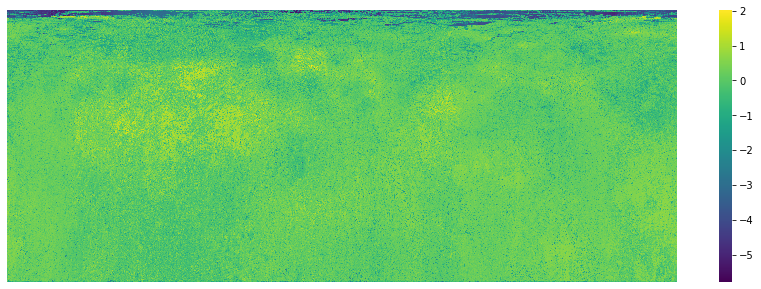

In [68]:
plt.subplots(figsize=(15,5))
sns.heatmap(l,xticklabels=False,yticklabels=False,cmap='viridis')

In [97]:
import joblib

In [98]:
joblib.dump(modelk,'rf_model')

['rf_model']